In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from msfm.utils import files

In [2]:
conf = "/global/u2/a/athomsen/multiprobe-simulation-forward-model/configs/v9/linear_bias.yaml"
conf = files.load_config(conf)

_, patches_pix_dict, _, _ = files.load_pixel_file(conf)
base_patch = patches_pix_dict["metacal"][0][0]

24-08-06 07:41:59     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_fiducial_512.h5 


In [3]:
n_examples_per_cosmo = (
    conf["analysis"]["n_patches"]
    * conf["analysis"]["grid"]["n_perms_per_cosmo"]
    * conf["analysis"]["grid"]["n_noise_per_example"]
)
n_z = len(conf["survey"]["metacal"]["z_bins"] + conf["survey"]["maglim"]["z_bins"])

In [4]:
rng = np.random.default_rng()

In [5]:
%timeit
samples = rng.standard_normal(
    size=(n_examples_per_cosmo, base_patch.size, n_z),
    dtype=np.float32
)

In [14]:
# noise_file = f"/pscratch/sd/a/athomsen/v11desy3/v9/linear_bias/cls/white_noise.h5"
noise_file = f"/pscratch/sd/a/athomsen/v11desy3/v9/linear_bias/cls/white_noise_0000.h5"

with h5py.File(noise_file, "r") as f:
    print(f.keys())
    cls = f["cls/raw"][:]
    
print(cls.shape)

<KeysViewHDF5 ['cls']>
(240, 1536, 36)


In [15]:
cls.shape

(240, 1536, 36)

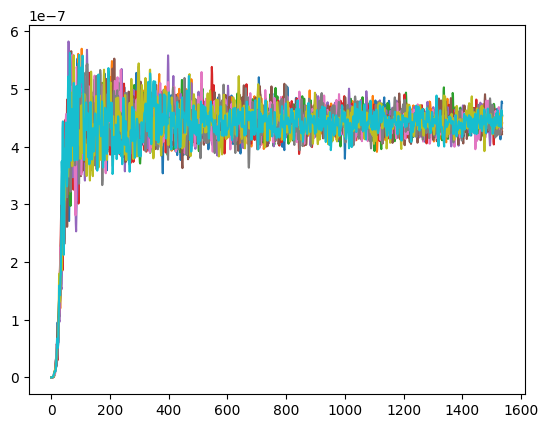

In [16]:
for i in range(10):
    plt.plot(cls[i*10,:,0])

(40000, 1536, 36)


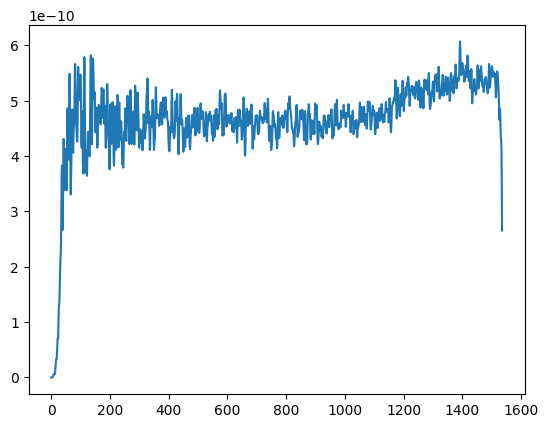

In [19]:
with h5py.File("/pscratch/sd/a/athomsen/v11desy3/v9/linear_bias/cls/fiducial_cls.h5", "r") as f:
    print(f["cls/raw"].shape)
    cl_example = f["cls/raw"][0,:,0]
    
plt.plot(cl_example)

In [17]:
with h5py.File("/pscratch/sd/a/athomsen/temp.h5", "w") as f:
    f.create_dataset("test", shape=(10,10), dtype=np.float32)
    f.create_dataset("test", shape=(10,10), dtype=np.float32)

ValueError: Unable to create dataset (name already exists)